$ \newcommand{\mbf}{\mathbf} $
$ \newcommand{\norm}[1]{\left\Vert#1\right\Vert} $
$ \newcommand{\abs}[1]{\left\vert#1\right\vert} $
$ \newcommand{\Rar}{\Longrightarrow} $
$ \newcommand{\Dar}{\Longleftrightarrow} $

# O método de Euler

## $ \S 1 $ Introdução

### $ 1.1 $ Descrição do método

O **método de Euler** é o procedimento numérico mais básico para resolução de equações diferenciais ordinárias de primeira ordem
$$
\mbf y' = F(t, \mbf y)\,, \quad \text{onde} \quad \mbf y = (y_1, y_2, \dots, y_n),
$$
com uma condição inicial
$$
\mbf y(t_0) = \mbf y_0\,.
$$

A base do método é a aproximação de $ \mbf y $ pelo seu polinômio de Taylor de ordem 1:
$$
\mbf y(t+h) \approx \mbf y(t) + h\,\mbf y'(t),
$$
ou seja,
$$
\boxed{\mbf y(t+h) \approx \mbf y(t) + h\, F\big(t, \mbf y(t)\big)}
$$
Informalmente, a expressão do lado direito fornece uma estimativa para $ \mbf y $ em $ t+h $ a partir da informação disponível em $ t $. Ela pode ser usada para tabelar os valores sucessivos de $ \mbf y $ com um passo de tamanho $ h $ a partir do valor inicial $ \mbf y_0 = \mbf y(t_0) $.

### $ 1.2 $ Interpretação geométrica

Por simplicidade, suponha que estejamos lidando com uma única variável dependente $ y $ (ou seja, que $ \mbf y $ só tenha uma coordenada). A variação de $ y $ entre $ x $ e $ t + h $ é dada por
$$
y(t+h) - y(t) = \int_t^{t+h} y'(t)\,dt = \int_t^{x+h} F(t,y(t))\,dt.
$$
Geometricamente, esta expressão representa a área (com sinal) sob o gráfico de $ y' $. O método de Euler a substitui pela área de um retângulo de base $ h $ e altura $ y'(t) = F(t,y(t)) $. Claramente, o erro cometido é proporcional ao declive de $ y' $ em $ t $, ou seja, a $ y''(t) $.

Sob outra interpretação, a equação diferencial $ y' = f(t, y) $ nos diz como encontrar o coeficiente angular da reta tangente ao gráfico de uma solução em cada ponto $ t $ através do valor desta solução aí. O método de Euler parte do valor conhecido em $ t_0 $ para obter uma estimativa para $ y $ em $ t_0 + h $, efetivamente supondo que para $ h $ pequeno, o coeficiente angular não varia muito, e portanto $ y $ é aproximadamente linear entre $ t_0 $ e $ t_0 + h $. O procedimento é repetido para se obter uma estimativa para $ y(t_0 + 2h) $ a partir da aproximação calculada para $ y(t_0 + h) $, e assim por diante. O resultado é uma curva poligonal que, idealmente, aproxima o gráfico da solução exata.

## $ \S 2 $ Implementação do método de Euler

### $ 2.1 $ Implementação do método de Euler

In [124]:
def euler(F, t_0, y_0, x_max, h):
    import numpy as np
    
    ts = [t_0]
    ys = [y_0]
    
    t = t_0
    y = y_0
    while t < t_max:
        h = min(h, t_max - t)
        y += h * F(t, y)
        t += h
        ys.append(y)
        ts.append(t)
    
    return np.array(ts), np.array(ys)

### $ 2.2 $ Implementação de uma função para plotagem da solução

📝 Para comparação com a solução exata, utilizaremos o procedimento `odeint` da biblioteca `scipy.integrate` para resolução de EDOs de primeira ordem. Este procedimento tampouco resolve analiticamente uma EDO deste tipo, porém ele fornece um resultado numérico que aproxima a solução exata de maneira mais precisa que os métodos que discutiremos.

A sintaxe utilizada abaixo é: `odeint(F, y_0, ts, tfirst=True)` onde:
* $ F = F(t, y) $ é a expressão para $ y' $.
* $ y_0 = y(t_0) $ é o valor inicial de $ y $.
* `ts` é um array que contém os valores de $ t $ onde $ y $ será aproximada; o valor inicial $ t_0 $ que aparece na condição deve obrigatoriamente ser o $ 0 $-ésimo elemento do array.
* `tfirst=True` é usado para indicar que na expressão para $ F $, a primeira variável é $ t $, e não $ y $.
    

In [161]:
def plota_solucao(F, t_0, y_0, t_max, h):
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.integrate import odeint
    
    ts, ys = euler(F, t_0, y_0, t_max, h)
    ts_exata = np.linspace(t_0, t_max, num=201)
    ys_exata = odeint(F, y_0, ts_exata, tfirst=True)
    
    plt.plot(ts, ys, 'o')
    plt.plot(ts_exata, ys_exata, '-')
    plt.grid(True)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend(("Numérica", "Exata"), loc=0)
    plt.show()

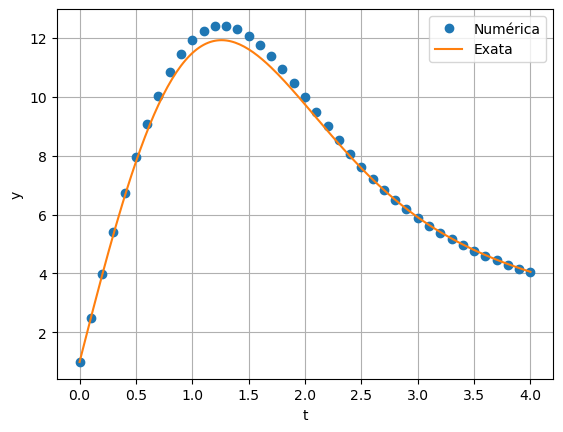

In [162]:
t_0 = 0
y_0 = 1
h = 0.1
t_max = 4
def f(t, y):
    return 15 - t * y

ts, ys = euler(f, t_0, y_0, t_max, h)
plota_solucao(f, t_0, y_0, t_max, h)


## $ \S 3 $ Problemas

**Problema 1:** Considere a equação diferencial de primeira ordem
$$
y' = y, \quad y(0) = 1.
$$

(a) Obtenha a solução exata analiticamente.

(b) Use o método de Euler para resolver numericamente a EDO no intervalo $ [0,4] $ com passos $ h $ de tamanhos $ 1 $, $ 0.5 $, $ 0.1 $ e  $ 0.05 $.

(c) Compare graficamente as soluções obtidas com a solução exata.

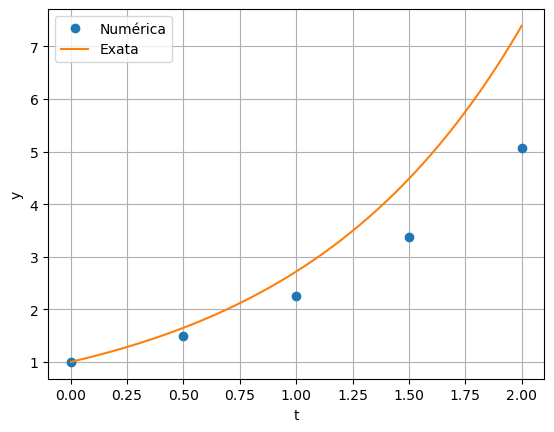

In [163]:
def f(t, y):
    return y

t_0 = 0
y_0 = 1
h = 0.5
t_max = 2
plota_solucao(f, t_0, y_0, t_max, h)

**Problema 2:** Considere a equação diferencial ordinária não-linear de primeira ordem
$$
y' = t^2 + y, \quad y(0) = 3.
$$

(a) Use o método de Euler para resolver numericamente a EDO no intervalo $ [0,3] $ com passos $ h $ de tamanhos $ 1 $, $ 0.5 $, $ 0.1 $ e  $ 0.05 $.

(b) Compare graficamente as soluções obtidas com a solução exata.

(c) Faça o mesmo para a EDO
$$
y' = y^2, \quad y(0) = 3.
$$
Você consegue explicar o resultado?

In [182]:
def f(t, y):
    return y**2

t_0 = 0
y_0 = 3
h = 0.1
t_max = 3
plota_solucao(f, t_0, y_0, t_max, h)

OverflowError: (34, 'Numerical result out of range')